# Análise de Dados com Google Sheets e Python - Desafio Final

Bootcamp Data Analytics 2024

*Autor: Letícia Simões*

## Bibliotecas

In [1]:
# Bibliotecas usadas
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

## Funções

In [2]:
def calcular_limites_centena(df, coluna):
    valor_max = df[coluna].max()
    limmax = ((valor_max // 100) + 1) * 100

    valor_min = df[coluna].min()
    limmin = (valor_min // 100) * 100

    return limmin, limmax


def plotar_grafico(df, linhas):
    # Calcula os limites
    limmin, limmax = calcular_limites_centena(df, linhas[0]['y'])

    # Define o estilo
    sns.set_style('ticks')

    # Plotando o gráfico
    plt.figure(figsize=(10, 5))  # Definindo o tamanho da figura

    # Itera sobre as linhas fornecidas e plota cada uma delas
    for linha in linhas:
        sns.lineplot(
            x=linha['x'],
            y=linha['y'],
            data=df,
            marker='o',
            color=linha['color'],
            markersize=3,
            label=linha['label'],
        )

    plt.title('Vendas vs. Período')
    plt.xlabel('Período (Mês-Ano)')
    plt.ylabel('Valores')
    plt.xticks(
        rotation=45
    )  # Rotacionando os ticks no eixo X para melhorar a legibilidade
    plt.grid(True)
    sns.despine()
    plt.ylim(limmin, limmax)  # Define os limites para o eixo Y

    # Adiciona a legenda
    plt.legend()

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

## Proposta do Desafio

Você recebeu um dataset denominado `vendas_loja.csv`, que contém informações de vendas de uma loja. Este dataset inclui duas colunas:
- **`data`**: Representa o mês e o ano do registro de vendas (formato MM/AAAA).
- **`vendas`**: Reflete o número total de vendas durante o mês correspondente.

### Objetivo:
O objetivo deste desafio é analisar dados históricos de vendas, calcular métricas e prever vendas futuras, seguindo etapas específicas.

### Tarefas:

- **Média Móvel Centrada**: Calcule a média móvel centrada de 12 meses para suavizar a série temporal e capturar as tendências subjacentes.
- **Índice Sazonal**: Determine o índice sazonal para identificar padrões recorrentes ao longo do ano.
- **Remoção da Sazonalidade**: Remova a sazonalidade para obter uma série ajustada.
- **Previsão de Vendas**: Utilize a série ajustada para prever as vendas dos próximos 12 meses.
- **Erro Absoluto Médio (MAE)**: Calcule o MAE comparando previsões e dados reais para avaliar a precisão das previsões.
- **Gráfico de Linhas**: Plote um gráfico mostrando vendas reais, série ajustada e previsões para analisar a conformidade entre previsões e dados reais.

### Ferramentas Sugeridas:
- **Google Sheets**: Este desafio foi projetado para ser resolvido principalmente com o Google Sheets.
- **Python**: Para um desafio adicional e fins de aprimoramento, tente resolver as etapas utilizando Python.

### Observações:
Verifique a integridade e a qualidade dos dados antes iniciar os cálculos. Documente cada etapa do processo para garantir rastreabilidade e clareza dos resultados.

### Conceitos Fundamentais

---
**O que é Sazonalidade?**

Sazonalidade é quando certos fenômenos ou padrões se repetem em momentos específicos, como anual, mensal ou diariamente. No mundo dos negócios, isso se refere a influências externas que, com frequência, afetam os resultados financeiros de uma empresa. Essas variações podem ser ocasionadas por eventos como feriados, datas festivas e mudanças climáticas, que podem tanto impulsionar quanto prejudicar o desempenho de um negócio. No comércio, estratégias sazonais são comuns para aumentar os lucros durante períodos de alta demanda por produtos específicos, como sorvetes no verão e agasalhos no inverno.

---
**O que é Índice Sazonal?**

O índice sazonal é uma medida que avalia as mudanças regulares na demanda por um bem ou serviço ao longo do tempo. Ele ajuda a quantificar e comparar essas variações sazonais, facilitando a análise de tendências. Isso permite que as empresas monitorem e ajustem suas operações de acordo com cada período sazonal.

---
**O que é Média Móvel?**

A média móvel é usada para entender como os preços de mercado estão se movendo, mostrando se estão subindo, mantendo-se estáveis ou caindo. Visualmente, é uma linha que se adapta à medida que novos dados chegam, suavizando variações de curto prazo em séries temporais. Ela calcula a média de um número fixo de observações consecutivas ao longo do tempo, criando um novo conjunto de dados onde as flutuações aleatórias são reduzidas, facilitando a identificação de tendências.

---
**O que é Erro Absoluto?**

O erro absoluto é a diferença numérica entre um valor observado ou estimado e o valor verdadeiro ou aceito como correto. Por exemplo, se uma estimativa prevê a venda de 100 unidades de um produto e na realidade são vendidas 95 unidades, o erro absoluto é de 5 unidades. Ele é uma medida simples da precisão da estimativa, calculada pela diferença entre o valor previsto e o valor real, sem considerar a direção dessa diferença.

---
**O que é Tendência Central?**

Tendência central refere-se ao valor que representa o ponto central ao redor do qual os dados se distribuem. As medidas mais comuns são a *média*, que é a soma de todos os valores dividido pelo número de observações e sensível a outliers; a *mediana*, que é o valor central em um conjunto de dados ordenados e menos afetado por valores extremos; e a *moda*, o valor mais frequente nesse conjunto de dados. Cada uma dessas medidas oferece uma perspectiva única sobre a centralidade dos dados, sendo escolhida conforme a distribuição e características específicas da amostra analisada.

---

## Conhecendo a base de dados

In [3]:
# Importação da base de dados
df = pd.read_csv('vendas_loja.csv')

# Visualizando os dados
df.head()

,Data,Vendas
0,2019-01,200
1,2019-02,180
2,2019-03,220
3,2019-04,240
4,2019-05,260


In [4]:
# Tipos de variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    36 non-null     object
 1   Vendas  36 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 704.0+ bytes


In [5]:
# Estatísticas descritivas das variáveis numéricas
df.describe()

,Vendas
count,36.000000
mean,289.166667
std,62.169124
min,180.000000
25%,240.000000
50%,295.000000
75%,322.500000
max,420.000000


In [6]:
# Estatísticas descritivas das variáveis categóricas
df.describe(include=['object'])

,Data
count,36
unique,36
top,2019-01
freq,1


In [7]:
# Valores faltantes
df.isnull().sum()

Data      0
Vendas    0
dtype: int64

### Gráfico

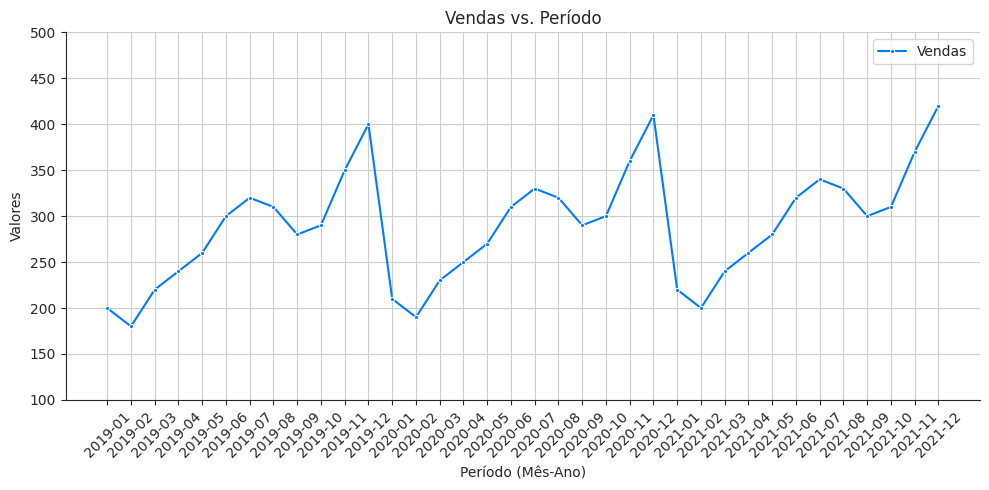

In [8]:
# Gráfico
linhas = [
    {'x': 'Data', 'y': 'Vendas', 'color': '#007BFF', 'label': 'Vendas'}
]

plotar_grafico(df, linhas)

#### **Conclusão**

**Análise da Sazonalidade nas Vendas**

O gráfico das vendas ao longo do ano revela variações significativas, indicando que há fortes padrões sazonais nas vendas. Isso implica que há períodos de aumento e queda nas vendas, seguindo um padrão previsível.

**Picos de Vendas no Final do Ano**

Observa-se um padrão consistente de aumento nas vendas durante o último trimestre do ano. Especificamente, dezembro se destaca como o maior pico de vendas ao longo de todo ano.

**Quedas de Vendas no Início do Ano**

Por outro lado, no primeiro trimestre do ano (janeiro, fevereiro e março), as vendas tendem a diminuir. Com as maiores baixas ocorrendo frequentemente em fevereiro.

**Importância da Sazonalidade**

Esses padrões sazonais são importantes para entender os períodos de alta e baixa demanda ao longo do ano. Isso pode orientar estratégias como gestão de estoque, planejamento de marketing e ajustes financeiros para melhor atender às necessidades dos clientes em diferentes épocas.

## Tratamento de dados

In [9]:
# Criar um novo dataframe para o tratamento dos dados, mantendo o original intacto.
newdf = df.copy()

# Renomear a coluna "Data" para "Periodo".
newdf = newdf.rename(columns={'Data': 'Periodo'})

# Criar uma nova coluna "Data" (Datetime) a partir da coluna "Periodo".
newdf['Data'] = pd.to_datetime(newdf['Periodo'])

# Criar uma coluna "PeriodoSazonal" (int) para representar o mês correspondente.
newdf['PeriodoSazonal'] = newdf['Data'].dt.month

# Visualizando os dados tratados
newdf.head()

,Periodo,Vendas,Data,PeriodoSazonal
0,2019-01,200,2019-01-01,1
1,2019-02,180,2019-02-01,2
2,2019-03,220,2019-03-01,3
3,2019-04,240,2019-04-01,4
4,2019-05,260,2019-05-01,5


In [10]:
# Conferindo os tipos de variáveis do novo dataframe
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Periodo         36 non-null     object        
 1   Vendas          36 non-null     int64         
 2   Data            36 non-null     datetime64[ns]
 3   PeriodoSazonal  36 non-null     int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 1.1+ KB


## Manipulação de dados

In [11]:
# Calcular a Média Móvel Centrada (MMC) do período de 12 meses
newdf['MMCAnual'] = newdf['Vendas'].rolling(window=12, center=True).mean()

# Calcular a Média da Média Móvel Centrada
media_MMCAnual = newdf['MMCAnual'].mean()

# Adicionar coluna "MediaMMC"
newdf['MediaMMC'] = media_MMCAnual

# Visualizando os dados
newdf.head(10)

,Periodo,Vendas,Data,PeriodoSazonal,MMCAnual,MediaMMC
0,2019-01,200,2019-01-01,1,NaN,289.166667
1,2019-02,180,2019-02-01,2,NaN,289.166667
2,2019-03,220,2019-03-01,3,NaN,289.166667
3,2019-04,240,2019-04-01,4,NaN,289.166667
4,2019-05,260,2019-05-01,5,NaN,289.166667
5,2019-06,300,2019-06-01,6,NaN,289.166667
6,2019-07,320,2019-07-01,7,279.166667,289.166667
7,2019-08,310,2019-08-01,8,280.000000,289.166667
8,2019-09,280,2019-09-01,9,280.833333,289.166667
9,2019-10,290,2019-10-01,10,281.666667,289.166667


In [12]:
# Calcular Índice Sazonal
newdf['IS'] = newdf['Vendas'] / newdf['MediaMMC']

# Calcular Índice Sazonal Anual
newdf['ISAnual'] = newdf.groupby('PeriodoSazonal')['IS'].transform('mean')

# Calcular Previsões
newdf['Previsao'] = newdf['MediaMMC'] * newdf['ISAnual']

# Converter a coluna "Previsao" para o tipo inteiro
newdf['Previsao'] = newdf['Previsao'].astype(int)

# Calcular Erro Absoluto
newdf['ErroAbsoluto'] = abs(newdf['Vendas'] - newdf['Previsao'])

# Visualizando os dados
newdf.head(10)

,Periodo,Vendas,Data,PeriodoSazonal,MMCAnual,MediaMMC,IS,ISAnual,Previsao,ErroAbsoluto
0,2019-01,200,2019-01-01,1,NaN,289.166667,0.691643,0.726225,210,10
1,2019-02,180,2019-02-01,2,NaN,289.166667,0.622478,0.657061,190,10
2,2019-03,220,2019-03-01,3,NaN,289.166667,0.760807,0.795389,229,9
3,2019-04,240,2019-04-01,4,NaN,289.166667,0.829971,0.864553,250,10
4,2019-05,260,2019-05-01,5,NaN,289.166667,0.899135,0.933718,270,10
5,2019-06,300,2019-06-01,6,NaN,289.166667,1.037464,1.072046,310,10
6,2019-07,320,2019-07-01,7,279.166667,289.166667,1.106628,1.141210,329,9
7,2019-08,310,2019-08-01,8,280.000000,289.166667,1.072046,1.106628,320,10
8,2019-09,280,2019-09-01,9,280.833333,289.166667,0.968300,1.002882,289,9
9,2019-10,290,2019-10-01,10,281.666667,289.166667,1.002882,1.037464,299,9


### Erro Absoluto Médio

In [13]:
MAE = newdf['ErroAbsoluto'].mean()
print(f'Erro Absoluto Médio (MAE): {MAE:.2f}')

Erro Absoluto Médio (MAE): 6.78


### Previsões para o próximo ano

In [14]:
# Criar dataframe de previsões
forecastdf = pd.DataFrame()

# Adicionar o período correspondente ao ano de 2022
forecastdf['Periodo'] = [f'2022-{month:02}' for month in range(1, 13)]

# Coluna "Vendas" deve permanecer vazia
forecastdf['Vendas'] = np.nan

# Criar coluna "Data" (Datetime) a partir da coluna "Periodo".
forecastdf['Data'] = pd.to_datetime(forecastdf['Periodo'])

# Criar coluna "PeriodoSazonal" (int) para representar o mês correspondente.
forecastdf['PeriodoSazonal'] = forecastdf['Data'].dt.month

# Preencher a coluna "Previsao" com as previsões dos primeiros 12 meses.
forecastdf['Previsao'] = newdf['Previsao'].head(12).values

# Visualizando o novo dataframe
forecastdf.head(12)

,Periodo,Vendas,Data,PeriodoSazonal,Previsao
0,2022-01,NaN,2022-01-01,1,210
1,2022-02,NaN,2022-02-01,2,190
2,2022-03,NaN,2022-03-01,3,229
3,2022-04,NaN,2022-04-01,4,250
4,2022-05,NaN,2022-05-01,5,270
5,2022-06,NaN,2022-06-01,6,310
6,2022-07,NaN,2022-07-01,7,329
7,2022-08,NaN,2022-08-01,8,320
8,2022-09,NaN,2022-09-01,9,289
9,2022-10,NaN,2022-10-01,10,299


In [15]:
# Unificar dataframes
newdf = pd.concat([newdf, forecastdf], ignore_index=True)

# Visualizando os dados
newdf.tail(15)

,Periodo,Vendas,Data,PeriodoSazonal,MMCAnual,MediaMMC,IS,ISAnual,Previsao,ErroAbsoluto
33,2021-10,310.0,2021-10-01,10,NaN,289.166667,1.072046,1.037464,299,11.0
34,2021-11,370.0,2021-11-01,11,NaN,289.166667,1.279539,1.244957,360,10.0
35,2021-12,420.0,2021-12-01,12,NaN,289.166667,1.452450,1.417867,410,10.0
36,2022-01,NaN,2022-01-01,1,NaN,NaN,NaN,NaN,210,NaN
37,2022-02,NaN,2022-02-01,2,NaN,NaN,NaN,NaN,190,NaN
38,2022-03,NaN,2022-03-01,3,NaN,NaN,NaN,NaN,229,NaN
39,2022-04,NaN,2022-04-01,4,NaN,NaN,NaN,NaN,250,NaN
40,2022-05,NaN,2022-05-01,5,NaN,NaN,NaN,NaN,270,NaN
41,2022-06,NaN,2022-06-01,6,NaN,NaN,NaN,NaN,310,NaN
42,2022-07,NaN,2022-07-01,7,NaN,NaN,NaN,NaN,329,NaN


### Gráfico

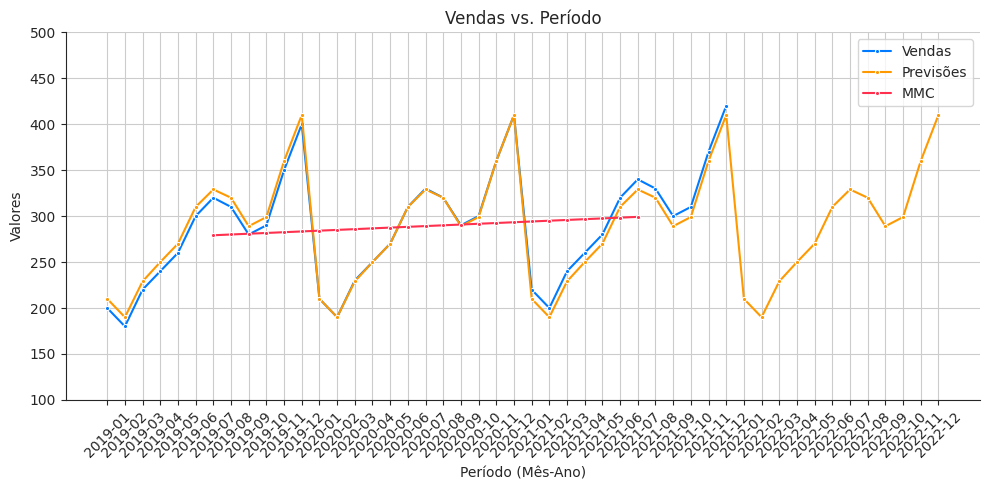

In [16]:
# Gráfico - Vendas vs. Período
linhas = [
    {'x': 'Periodo', 'y': 'Vendas',   'color': '#007BFF', 'label': 'Vendas'},
    {'x': 'Periodo', 'y': 'Previsao', 'color': '#FF9900', 'label': 'Previsões'},
    {'x': 'Periodo', 'y': 'MMCAnual', 'color': '#FF304D', 'label': 'MMC'}
]

plotar_grafico(newdf, linhas)

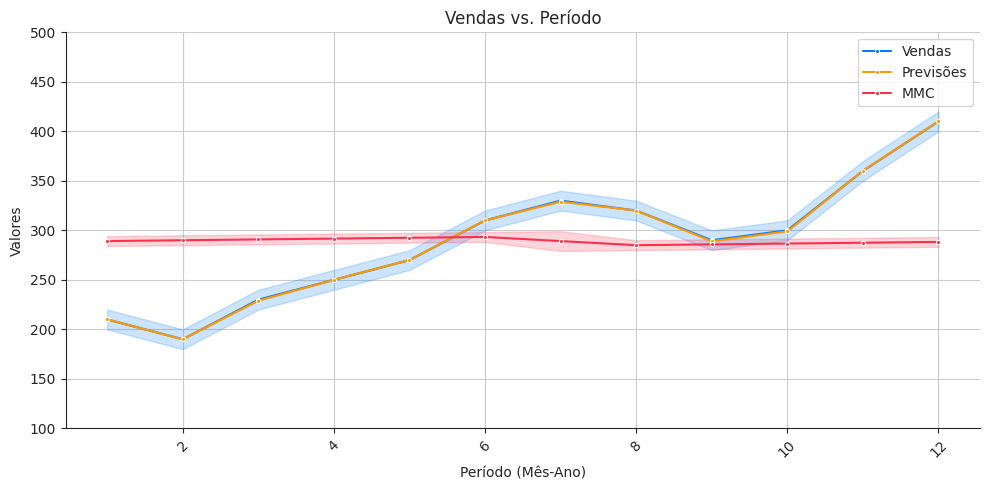

In [17]:
# Gráfico - Vendas vs. Período Sazonal
linhas = [
    {'x': 'PeriodoSazonal', 'y': 'Vendas',   'color': '#007BFF', 'label': 'Vendas'},
    {'x': 'PeriodoSazonal', 'y': 'Previsao', 'color': '#FF9900', 'label': 'Previsões'},
    {'x': 'PeriodoSazonal', 'y': 'MMCAnual', 'color': '#FF304D', 'label': 'MMC'}
]

plotar_grafico(newdf, linhas)

#### **Conclusão**

O gráfico de linhas ilustra a comparação entre _Vendas Reais_, a _Média Móvel Centrada (MMC)_ e _Previsões de Vendas_ ao longo do período observado.

**Vendas Reais vs. Previsões**

A linha das previsões praticamente se sobrepõe à linha das vendas reais na maior parte do período observado. Isso indica que o modelo de previsão que utilizamos é bastante preciso. A proximidade entre essas duas linhas sugere que o método de cálculo de previsões baseado no índice sazonal e na média móvel centrada foi bem-sucedido em capturar a variação sazonal e projetar as vendas futuras de forma confiável.

**Erro Absoluto Médio**

O Erro Absoluto Médio (MAE) de aproximadamente 6,78 sugere que a margem de erro em nossas previsões é relativamente baixa. Isso quer dizer que, em média, nossas previsões de vendas desviam apenas 6,78 pontos das vendas reais, o que é aceitável e demonstra a precisão de nosso modelo de previsão.

**Média Móvel Centrada (MMC)**

A linha da Média Móvel Centrada (MMC), que remove os efeitos da sazonalidade, apresenta uma trajetória mais suave e constante, refletindo uma tendência geral estável nas vendas ajustadas. Isso ajuda a entender a tendência de longo prazo sem os efeitos dos ciclos sazonais.

<br>

Em resumo, o gráfico demonstra que nosso método de previsão é robusto e eficaz para analisar e projetar vendas. Ele oferece uma base sólida para estratégias futuras e ajustes operacionais, facilitando a antecipação de demandas e o planejamento eficiente de recursos. Ao combinar previsões com a eliminação da sazonalidade, obtemos uma perspectiva abrangente, que permite uma visão detalhada de curto prazo e uma compreensão das tendências de longo prazo.